# Imbed DOG

In [ ]:
from imbed.imbed_project import Project, Projects

projects = Projects('local')

In [8]:
from imbed.imbed_project import Project, Projects

project = Project.from_mall('local')

In [9]:
project.mall

{'misc': Files(rootdir='/Users/thorwhalen/Dropbox/_odata/app_data/imbed/projects/spaces/imbed_project_d9d8557f/stores/misc', subpath='', pattern_for_field=None, max_levels=None, include_hidden=False, assert_rootdir_existence=False),
 'segments': Files(rootdir='/Users/thorwhalen/Dropbox/_odata/app_data/imbed/projects/spaces/imbed_project_d9d8557f/stores/segments', subpath='', pattern_for_field=None, max_levels=None, include_hidden=False, assert_rootdir_existence=False),
 'embeddings': Files(rootdir='/Users/thorwhalen/Dropbox/_odata/app_data/imbed/projects/spaces/imbed_project_d9d8557f/stores/embeddings', subpath='', pattern_for_field=None, max_levels=None, include_hidden=False, assert_rootdir_existence=False),
 'clusters': Files(rootdir='/Users/thorwhalen/Dropbox/_odata/app_data/imbed/projects/spaces/imbed_project_d9d8557f/stores/clusters', subpath='', pattern_for_field=None, max_levels=None, include_hidden=False, assert_rootdir_existence=False),
 'planar_embeddings': Files(rootdir='/Us

In [12]:
project.mall['segments']['segments_1'] = ['hi', 'there', 'segments']

In [11]:
project.mall['segments']['segments_1']

['hi', 'there', 'segments']

# Demo: Using the Projects Class

This demo shows how to use the `Projects` container and the `Project` class for managing text segments, embeddings, and planarizations.

In [1]:
from imbed.imbed_project import Project, Projects

project = Project.from_mall()

In [3]:
from functools import partial
project.embedders['constant_vectorizer_with_sleep_7'] = partial(project.embedders['constant_vectorizer'], sleep_s=7)

In [4]:
list(project.embedders)

['constant_vectorizer',
 'simple_text_embedder',
 'text-embedding-3-small',
 'text-embedding-3-large',
 'default',
 'constant_vectorizer_with_sleep_7']

In [5]:
if sorted(project.segments.keys()) == ['hi', 'w']:
    print("Deleting all segments from the project...")
    _ = list(map(project.segments.__delitem__, project.segments.keys()))

In [ ]:
from imbed.imbed_project import Project, Projects

project = Project.from_mall(default_embedder='constant_vectorizer_with_sleep_7')
project.add_segments({'hi': 'Hello', 'w': 'world'})


['hi', 'w']

In [ ]:
project.embeddings

{}

In [7]:
list(project.planarizers)

['constant_planarizer',
 'identity_planarizer',
 'random_planarizer',
 'circular_planarizer',
 'grid_planarizer',
 'pca_planarizer',
 'tsne_planarizer',
 'umap_planarizer',
 'mds_planarizer',
 'isomap_planarizer',
 'lle_planarizer',
 'spectral_embedding_planarizer',
 'factor_analysis_planarizer',
 'kernel_pca_planarizer',
 'fast_ica_planarizer',
 'nmf_planarizer',
 'truncated_svd_planarizer',
 'sparse_random_projection_planarizer',
 'gaussian_random_projection_planarizer',
 'robust_pca_planarizer',
 'force_directed_planarizer',
 'default']

In [ ]:
planar_coords_key = project.compute('planarizer', 'constant_planarizer')
print(f"{planar_coords_key=}")
project.get_computation_status(planar_coords_key)

planar_coords_key='constant_planarizer_20250616_160810'


In [ ]:
if (status := project.get_computation_status(planar_coords_key)) is not None:
    print(f"Status for {planar_coords_key}: {status}")
else:
    print(f"{project.planar_coords=}")

project.planar_coords={'constant_planarizer_20250616_160810': {'hi': (1.0, 4.0), 'w': (2.0, 5.0)}}


In [27]:
planar_coords_key = project.compute('planarizer', 'identity_planarizer')
print(f"{planar_coords_key=}")
project.get_computation_status(planar_coords_key)

planar_coords_key='identity_planarizer_20250616_173254'


In [29]:
if (status := project.get_computation_status(planar_coords_key)) is not None:
    print(f"Status for {planar_coords_key}: {status}")
else:
    print(f"{project.planar_coords=}")

project.planar_coords={'constant_planarizer_20250616_160810': {'hi': (1.0, 4.0), 'w': (2.0, 5.0)}, 'identity_planarizer_20250616_173254': {'hi': (0.1, 0.2), 'w': (0.1, 0.2)}}


In [19]:
list(project.clusterers)

['constant_clusterer',
 'random_clusterer',
 'threshold_clusterer',
 'kmeans_clusterer',
 'dbscan_clusterer',
 'hierarchical_clusterer',
 'meanshift_clusterer',
 'spectral_clusterer',
 'gmm_clusterer',
 'affinity_propagation_clusterer',
 'optics_clusterer',
 'birch_clusterer',
 'minibatch_kmeans_clusterer',
 'nearest_neighbor_clusterer',
 'bisecting_kmeans_clusterer',
 'default']

In [30]:
cluster_indices_key = project.compute('clusterer', 'constant_clusterer')
print(f"{cluster_indices_key=}")
project.get_computation_status(cluster_indices_key)

cluster_indices_key='constant_clusterer_20250616_173422'


In [32]:
if (status := project.get_computation_status(cluster_indices_key)) is not None:
    print(f"Status for {cluster_indices_key}: {status}")
else:
    print(f"{project.cluster_indices=}")

project.cluster_indices={'constant_clusterer_20250616_164438': {'hi': 0, 'w': 1}, 'constant_clusterer_20250616_173422': {'hi': 0, 'w': 1}}


In [7]:
from imbed.imbed_project import Projects

# Define simple embedders and planarizers for demonstration
def simple_embedder(segments):
    if isinstance(segments, dict):
        return {k: [len(v), v.count(' '), v.count('.')] for k, v in segments.items()}
    else:
        return [[len(s), s.count(' '), s.count('.')] for s in segments]

def simple_planarizer(vectors):
    return [(float(v[0]), float(v[1]) if len(v) > 1 else 0.0) for v in vectors]

# Get the Projects container
projects = Projects()
# List the existing projects
list(projects)

[]

In [ ]:
# Create a new project with the simple embedder and planarizer
project = projects.create_project(
    embedders={'default': simple_embedder},
    planarizers={'default': simple_planarizer},
    async_embeddings=False  # Use synchronous mode for demo
)

print("Project created:", project._id)

Project created: demo_proj


In [ ]:
# Add some text segments to the project
segments = {
    "s1": "The quick brown fox.",
    "s2": "Jumps over the lazy dog.",
    "s3": "Python is fun!"
}
project.add_segments(segments)
print("Segments added:", list(project.segments.keys()))
print("Embeddings:", project.embeddings)

Segments added: ['s1', 's2', 's3']
Embeddings: {'s1': [20, 3, 1], 's2': [24, 4, 1], 's3': [14, 2, 0]}


In [10]:
# Compute planar coordinates for the segments' embeddings
save_key = project.compute("planarizer", "default")
print("Planar coordinates saved under:", save_key)
print("Planar coordinates:", project.planar_coords[save_key])

Planar coordinates saved under: default_20250613_101216
Planar coordinates: {'s1': (20.0, 3.0), 's2': (24.0, 4.0), 's3': (14.0, 2.0)}


In [ ]:
# Access the Projects container to retrieve the project
retrieved = projects[project._id]
print("Retrieved project:", retrieved._id)
print("Available segments:", list(retrieved.segments.keys()))

Retrieved project: demo_proj
Available segments: ['s1', 's2', 's3']


In [ ]:
list(projects)  # Should show the auto-generated project id(s)

['demo_proj']

In [ ]:

mesh = {
    'embeddings': (call, ['embedder', 'segments']),
    'planar_coords': (call, ['planarizer', 'embeddings']),
    'cluster_ids': call(['clusterer', 'embeddings']),
}

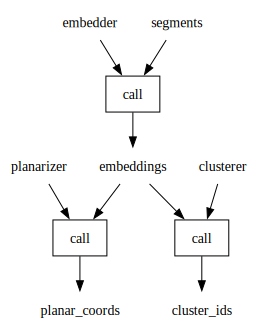

In [3]:
from meshed import code_to_dag

@code_to_dag
def imbed_projects():
    embeddings = call(embedder, segments)
    planar_coords = call(planarizer, embeddings)
    cluster_ids = call(clusterer, embeddings)

imbed_projects.dot_digraph()
    

In [5]:
def get_dependency_mapping(dag):
    """Extract dependency mapping from a DAG's func_nodes"""
    result = {}
    
    for func_node in dag.func_nodes:
        output_name = func_node.out  # The output variable name
        func_name = func_node.name   # The function name
        
        # Get input parameters from the function node's signature
        input_params = list(func_node.sig.names)
        
        # Build the dependency list: [function_name, *input_params]
        result[output_name] = [func_name] + input_params
    
    return result

get_dependency_mapping(imbed_projects)

{'embeddings': ['call', 'embedder', 'segments'],
 'planar_coords': ['call_02', 'planarizer', 'embeddings'],
 'cluster_ids': ['call_03', 'clusterer', 'embeddings']}

In [ ]:
import http_services